In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RANDOM_STATE = 599

In [2]:
df = pd.read_csv('Data in Table S6 of the Supporting Information.csv')
data = df.values
X = data[:, :11]
Y = data[:, 11:]

print("Original Y shape:", Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=RANDOM_STATE)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Missing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())

params = {
    'n_estimators': 400,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': RANDOM_STATE
}

model = MultiOutputRegressor(RandomForestRegressor(**params))
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f"Metrics train:\n\t MSR: {mean_squared_error(y_train, train_predictions):.4f} \n\t MAR: {mean_absolute_error(y_train, train_predictions):.4f} \n\t R2: {r2_score(y_train, train_predictions):.4f}")
print(f"Metrics test:\n\t MSR: {mean_squared_error(y_test, test_predictions):.4f} \n\t MAR: {mean_absolute_error(y_test, test_predictions):.4f} \n\t R2: {r2_score(y_test, test_predictions):.4f}")

Original Y shape: (35, 4)
Missing values in x_train: 0
Missing values in y_train: 0
Metrics train:
	 MSR: 0.1003 
	 MAR: 0.2416 
	 R2: 0.9157
Metrics test:
	 MSR: 0.2184 
	 MAR: 0.3379 
	 R2: 0.8448


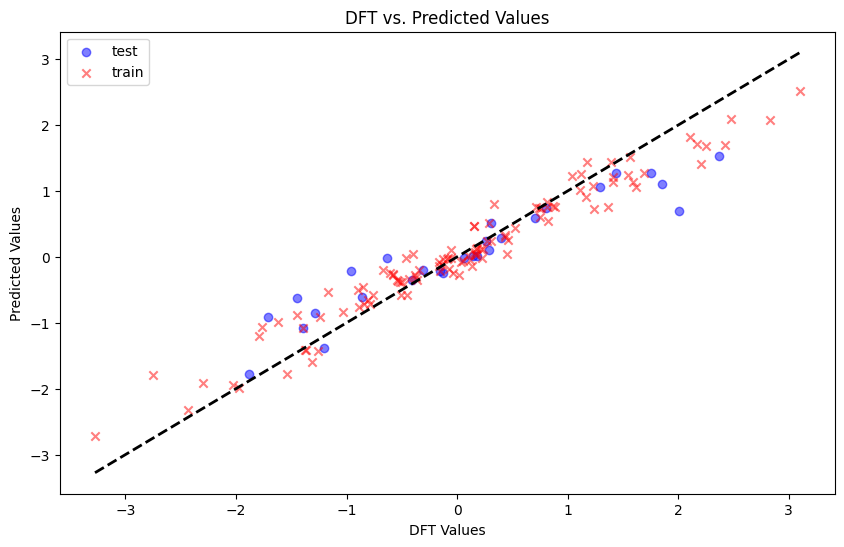

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')
plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

y_test:
0.1833992 -0.9639731 -0.8643401 1.855914
-1.1996728 0.3946019 0.7062999 0.309771
-0.3106448 -0.1273721 0.8037749 -0.154758
0.2616552 -1.3958221 1.7536669 -0.4085
0.2903862 -1.4525181 2.0043999 -0.631268
-1.8778668 2.3668659 -1.7131771 1.435178
0.1418092 0.0589219 -1.2819721 1.292241
test_predictions:
0.015014782499999995 -0.21234296249999937 -0.6066502250000011 1.1071191374999982
-1.3836390049999943 0.28397917250000043 0.5899584825000038 0.5190276899999982
-0.19608110249999927 -0.24387396750000043 0.7445790424999987 -0.2181946200000001
0.2354189924999999 -1.0723905674999954 1.2731976125000033 -0.3446045049999992
0.10880241749999991 -0.6313249599999987 0.6958502099999977 -0.022925185000000008
-1.77232844749999 1.5306421224999935 -0.9175399649999971 1.2802043075000034
0.02065909750000004 -0.010857420000000007 -0.8527900675000002 1.0565101274999993
y_train:
-1.5354418 2.2511439 -1.6232791 1.118577
0.2691722 -1.3912971 1.6930709 -0.359946
-1.3088428 0.3318529 0.0141299 1.17386
-0.0

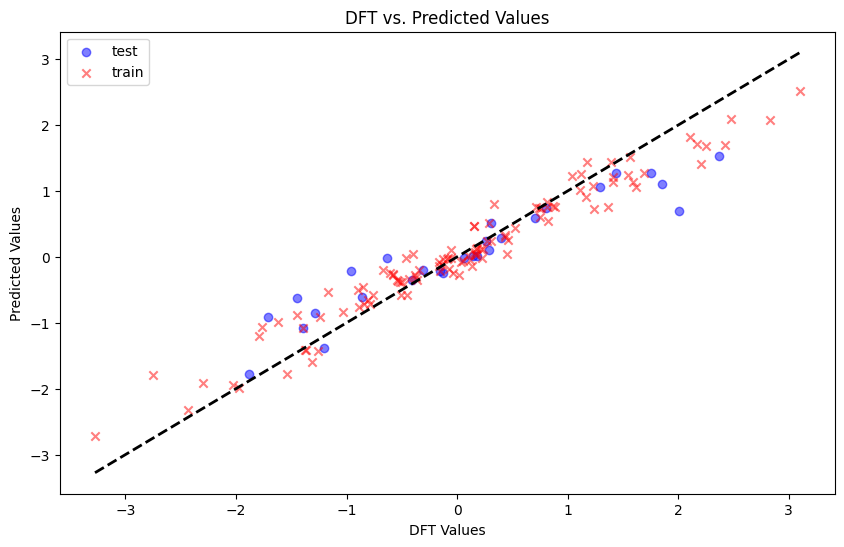

In [4]:
def print_no_brackets(array):
    for item in array:
        print(' '.join(map(str, item)))

print("y_test:")
print_no_brackets(y_test)

print("test_predictions:")
print_no_brackets(test_predictions)

print("y_train:")
print_no_brackets(y_train)

print("train_predictions:")
print_no_brackets(train_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')
plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()